# Scarpping Dataset dari Google Play Store

In [31]:
!pip install google-play-scraper

In [32]:
!pip install sastrawi

In [33]:
from google_play_scraper import app, reviews_all, Sort

scrapreview = reviews_all(
    'com.supercell.clashofclans',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=15000
)

In [34]:
import csv

with open('ulasan_hasil_scrapping.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

In [35]:
import pandas as pd
app_reviews_df = pd.read_csv('ulasan_hasil_scrapping.csv')

In [36]:
app_reviews_df.head()

,Review
0,Clash of clans sekarang sering gangguan atau l...
1,Buat kalian yang sering force close app periks...
2,kenapa sistem koneksi klien dengan server tida...
3,gamenya bagus dan saya sudah memainkannya sang...
4,"Kendala saya cuma di multipemain nya aja, soal..."


# Preprocessing text

In [37]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130500 entries, 0 to 130499
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  130500 non-null  object
dtypes: object(1)
memory usage: 1019.7+ KB


In [38]:
clean_df = app_reviews_df.dropna()

In [39]:
before = clean_df[clean_df.duplicated()]
len(before)

608

In [40]:
clean_df = clean_df.drop_duplicates()

In [41]:
after = clean_df[clean_df.duplicated()]
len(after)

0

In [42]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya', 'gk','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","ni", "coc", "mulu", "jdi", "ilang", "th", "klo", "jgn",
                          'lg', 'j', 'dah', 'trs', 'dri', 'y', 'ad', 'g', 'aja', 'id', 'nih', 't', 'yg', 'apk',  'ny', 'clash', 'clan','tuh', 'yah','ad', 'si', 'jd', 'udh', 'dulu',
                          'jg', 'jam', 'super', 'cell', 'clasher', 'game', 'klan', 'lgi', 'update', 'supercell', 'base', 'lag', 'clans','war', 'dlu', 'kali', 'x', 'global', 'chat',
                          'deh', 'dgn', 'utk', 'max', 'min', 'town', 'hall', 'ko', 'supercel', 'habi', 'liga', 'bug', 'tetep', "attack", 'hero','peleton', 'gini', 'eh', 'throfi',
                          'lvl', 'top', 'nge', 'troop', 'aj','trofi', 'hp', 'gems', 'tukang', 'google', 'play', 'email', 'lag', 'ngelag', 'basi', 'ganti', 'akun', 'gitu', 'trus', 'dll', 'ok', 'main', 'log', 'level',
                          'online', 'bintang', 'login', 'download', 'desa', 'parah', 'player', 'fitur', 'male', 'developer', 'download', 'nah', 'skrg', 'ram','male', 'kek', 'basis', 'mode', ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [44]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "kalo":"kalau", "knp":"kenapa", "karna":"karena", "tp":"tetapi", "sdh":"sudah","maen":"bermain", "udah":"sudah",
              "sy" : "saya", "sya" : "saya", "gwe" : "saya", "gue" : "saya", "gw" : "saya", "gua" : "saya", "tdk" : "tidak", "nyerang" : "menyerang", "gem" : "game", "pake": "pakai", "tpi":"tetapi", "yg":"yang", "pas":"saat", "yg": "yang", "bagu":"bagus", "trs":"kemudian",
              "tau":"tahu", "dikit": "sedikit", "nunggu":"menunggu", "bener":"benar", "biar":"agar", "kayak":"seperti", "sampe":"sampai", "biar":"agar", "perbaiki":"perbaikan", "bermain":"main", "bikin":"membuat", "ngak":"nggak", "gamenya":"game", "perbaiki":"perbaikan", "mainin":"main", "mainikan":"main",
              "kendala":"terhalang", "jaringannya":"jaringan",  "tambahkan":"tambah", "perbaiki":"perbaikan", "diperbaiki":"perbaikan", "pembaruan":"perubahan", "upgrade":"perubahan", "updet":"perubahan", "mainnya":"main", "memainkan":"main", "permainan":"game", "pembangunan":"perkembangan", "percepat":"kecepatan", "pembaharuan":"perubahan", "gede":"besar",


}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [45]:
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [46]:
clean_df.head()

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Clash of clans sekarang sering gangguan atau l...,Clash of clans sekarang sering gangguan atau l...,clash of clans sekarang sering gangguan atau l...,clash of clans sekarang sering gangguan atau l...,"[clash, of, clans, sekarang, sering, gangguan,...","[gangguan, lose, connect, sinyalnya, bagus, ng...",gangguan lose connect sinyalnya bagus ngebug b...
1,Buat kalian yang sering force close app periks...,Buat kalian yang sering force close app periks...,buat kalian yang sering force close app periks...,buat kalian yang sering force close app periks...,"[buat, kalian, yang, sering, force, close, app...","[force, close, app, periksa, device, pengaruh,...",force close app periksa device pengaruh app be...
2,kenapa sistem koneksi klien dengan server tida...,kenapa sistem koneksi klien dengan server tida...,kenapa sistem koneksi klien dengan server tida...,kenapa sistem koneksi klien dengan server tida...,"[kenapa, sistem, koneksi, klien, dengan, serve...","[sistem, koneksi, klien, server, dirubah, terp...",sistem koneksi klien server dirubah terputus k...
3,gamenya bagus dan saya sudah memainkannya sang...,gamenya bagus dan saya sudah memainkannya sang...,gamenya bagus dan saya sudah memainkannya sang...,game bagus dan saya sudah memainkannya sangat ...,"[game, bagus, dan, saya, sudah, memainkannya, ...","[bagus, memainkannya, saran, tolong, disconnec...",bagus memainkannya saran tolong disconnect men...
4,"Kendala saya cuma di multipemain nya aja, soal...",Kendala saya cuma di multipemain nya aja soaln...,kendala saya cuma di multipemain nya aja soaln...,terhalang saya cuma di multipemain nya aja soa...,"[terhalang, saya, cuma, di, multipemain, nya, ...","[terhalang, multipemain, nyari, lawan, diatas,...",terhalang multipemain nyari lawan diatas balai...


# Pelabelan

In [47]:
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [48]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
         polarity = 'neutral'

    return score, polarity

In [49]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    69039
positive    45292
neutral     15561
Name: count, dtype: int64


In [50]:
clean_df.head()

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,Clash of clans sekarang sering gangguan atau l...,Clash of clans sekarang sering gangguan atau l...,clash of clans sekarang sering gangguan atau l...,clash of clans sekarang sering gangguan atau l...,"[clash, of, clans, sekarang, sering, gangguan,...","[gangguan, lose, connect, sinyalnya, bagus, ng...",gangguan lose connect sinyalnya bagus ngebug b...,-10,negative
1,Buat kalian yang sering force close app periks...,Buat kalian yang sering force close app periks...,buat kalian yang sering force close app periks...,buat kalian yang sering force close app periks...,"[buat, kalian, yang, sering, force, close, app...","[force, close, app, periksa, device, pengaruh,...",force close app periksa device pengaruh app be...,-30,negative
2,kenapa sistem koneksi klien dengan server tida...,kenapa sistem koneksi klien dengan server tida...,kenapa sistem koneksi klien dengan server tida...,kenapa sistem koneksi klien dengan server tida...,"[kenapa, sistem, koneksi, klien, dengan, serve...","[sistem, koneksi, klien, server, dirubah, terp...",sistem koneksi klien server dirubah terputus k...,-12,negative
3,gamenya bagus dan saya sudah memainkannya sang...,gamenya bagus dan saya sudah memainkannya sang...,gamenya bagus dan saya sudah memainkannya sang...,game bagus dan saya sudah memainkannya sangat ...,"[game, bagus, dan, saya, sudah, memainkannya, ...","[bagus, memainkannya, saran, tolong, disconnec...",bagus memainkannya saran tolong disconnect men...,-26,negative
4,"Kendala saya cuma di multipemain nya aja, soal...",Kendala saya cuma di multipemain nya aja soaln...,kendala saya cuma di multipemain nya aja soaln...,terhalang saya cuma di multipemain nya aja soa...,"[terhalang, saya, cuma, di, multipemain, nya, ...","[terhalang, multipemain, nyari, lawan, diatas,...",terhalang multipemain nyari lawan diatas balai...,-13,negative


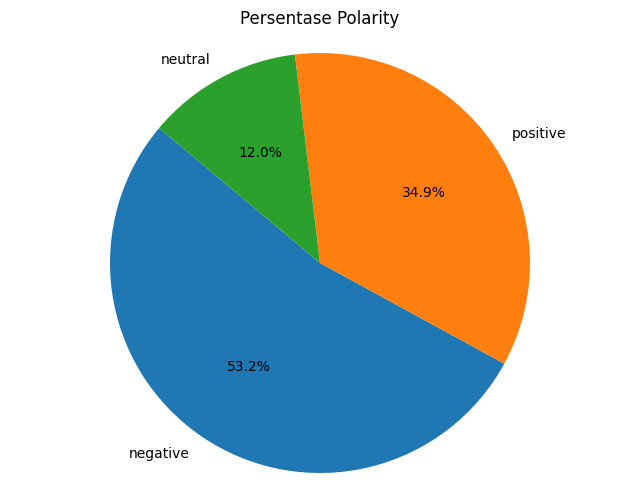

In [51]:
import matplotlib.pyplot as plt
counts = clean_df['polarity'].value_counts()
percentages = counts / counts.sum() * 100

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Polarity')
plt.axis('equal')
plt.show()

# Eksplorasi Label

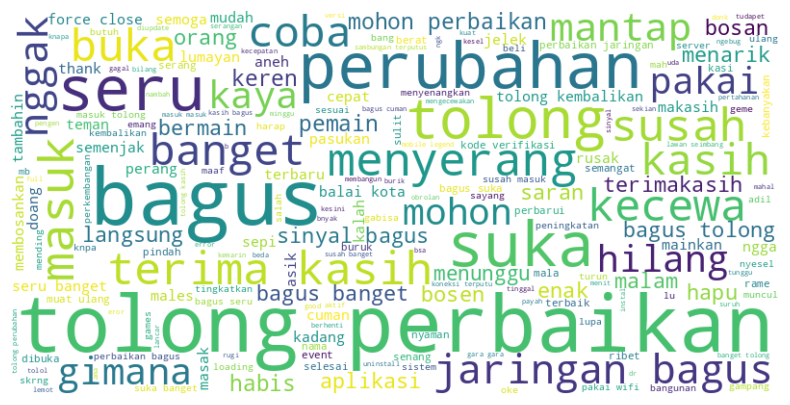

In [52]:
from wordcloud import WordCloud

text = ' '.join(clean_df['text_akhir'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

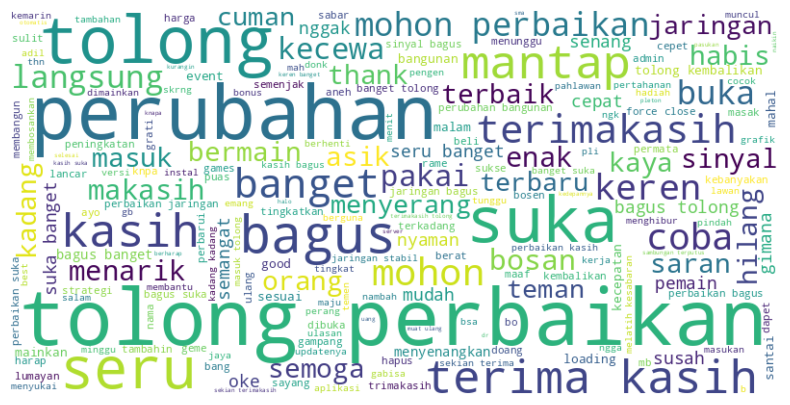

In [53]:
positive = clean_df[clean_df['polarity'] == "positive"]
text_positive = ' '.join(positive['text_akhir'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_positive)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

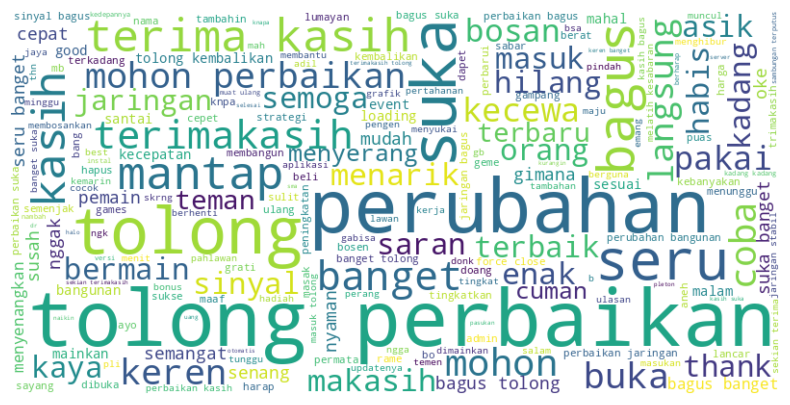

In [54]:
negative = clean_df[clean_df['polarity'] == "negative"]
text_negative = ' '.join(positive['text_akhir'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

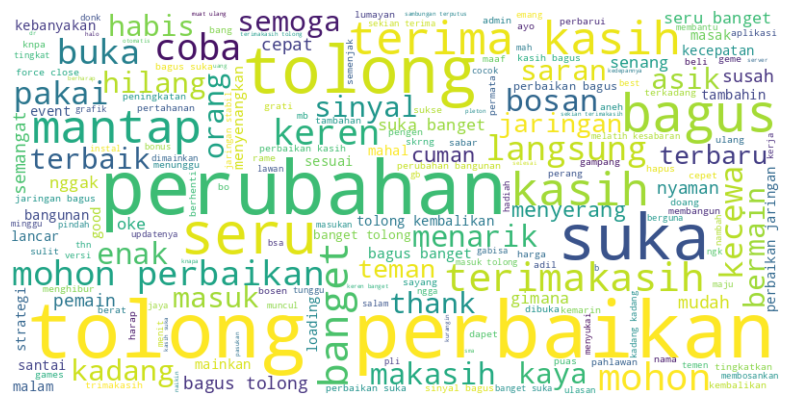

In [55]:
negative = clean_df[clean_df['polarity'] == "neutral"]
text_negative = ' '.join(positive['text_akhir'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [56]:
clean_df.to_csv('hasil_text_preprocessing.csv', index=False)